In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier as xgbc
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/cardio_data.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## prorecessing


In [3]:
data.drop('id',inplace=True,axis=1)

In [4]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data['age'] = np.round(data['age']/365,0).astype(np.int64)
data['age'].value_counts()

age
56    6031
54    5988
58    5702
60    5465
52    5303
50    5267
62    3926
64    3920
48    3194
46    2955
44    2837
40    2700
42    2624
55    1498
57    1452
53    1407
59    1355
51    1348
61    1221
49    1059
63    1016
41     766
45     757
47     754
43     690
39     409
65     352
30       4
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.duplicated().sum()

3816

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


## EDA

                                             |          | [  0%]   00:00 -> (? left)


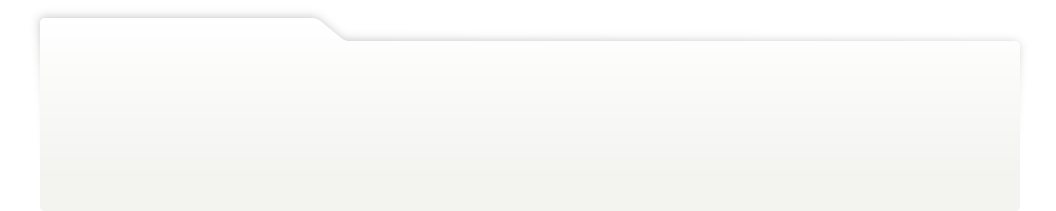
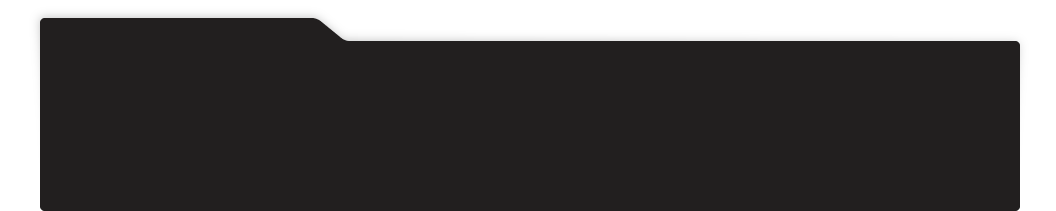
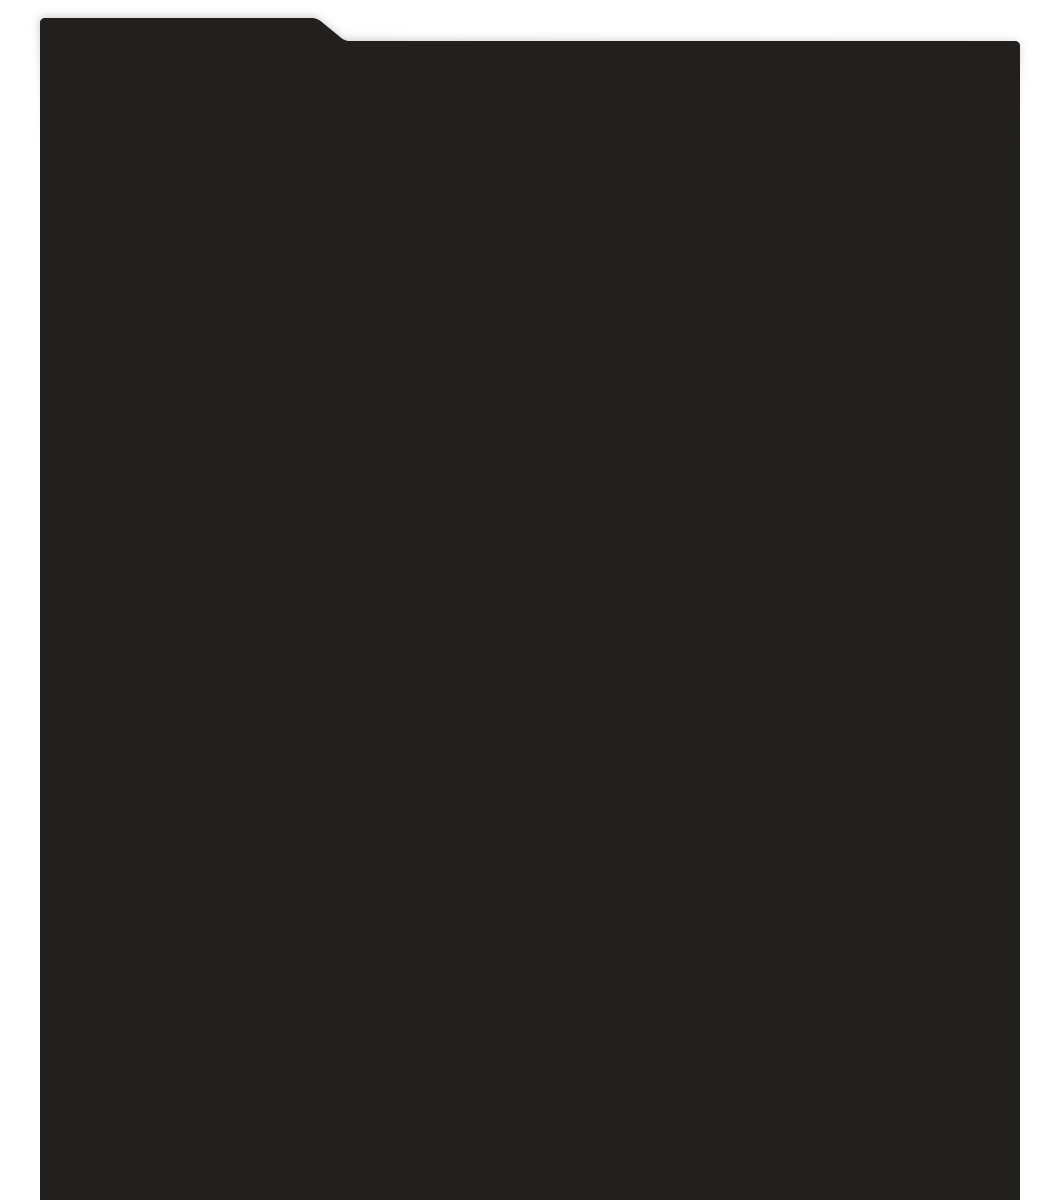
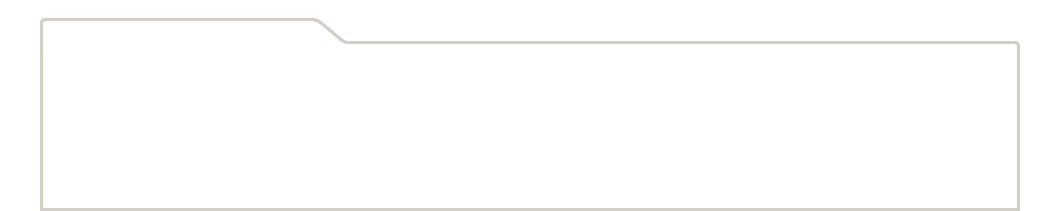
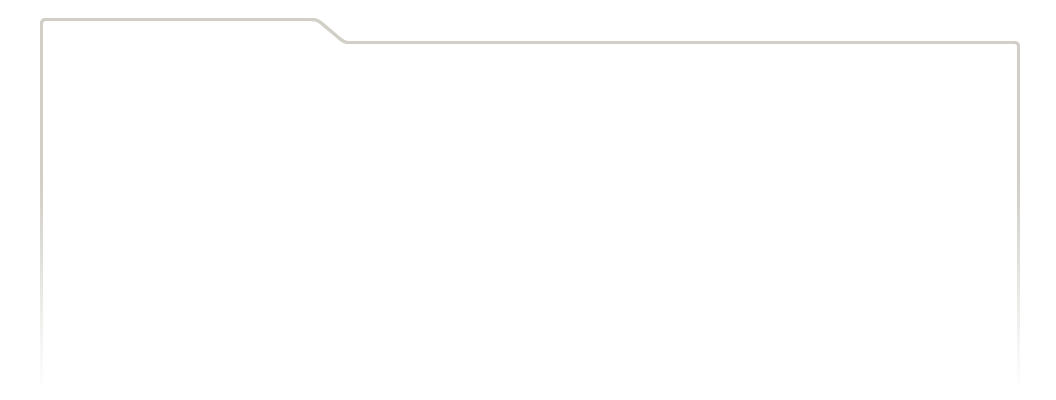
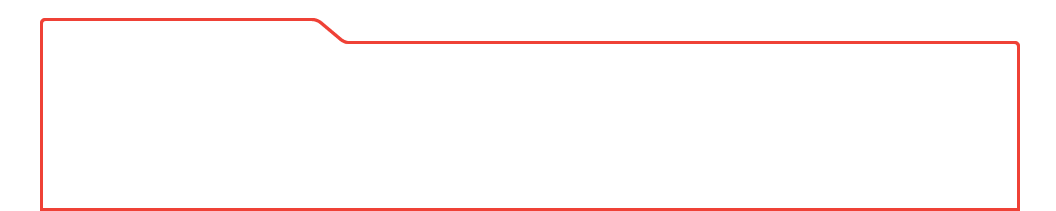
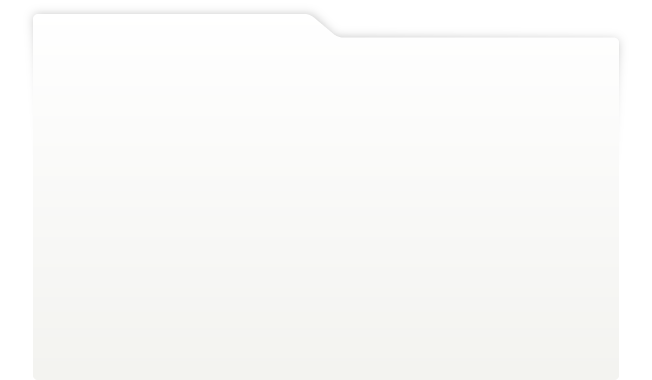
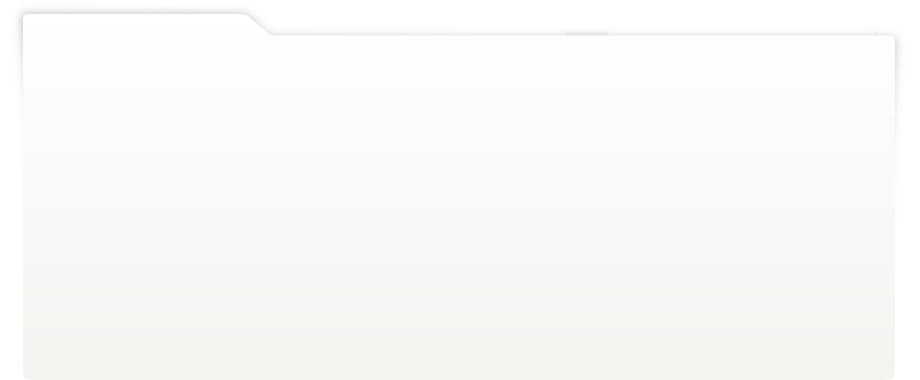
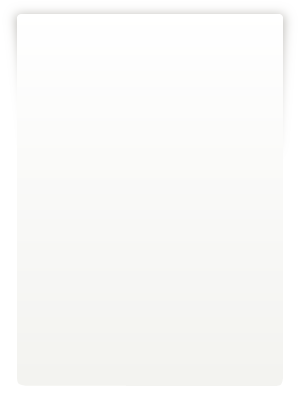
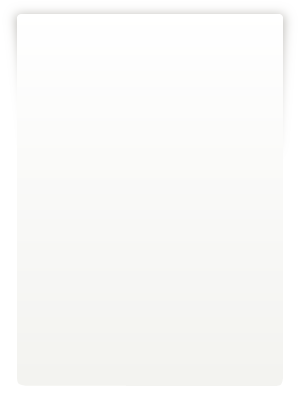
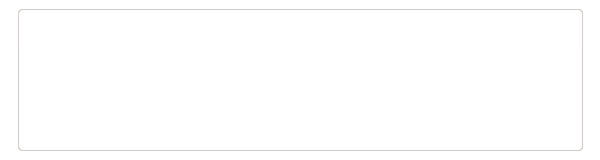
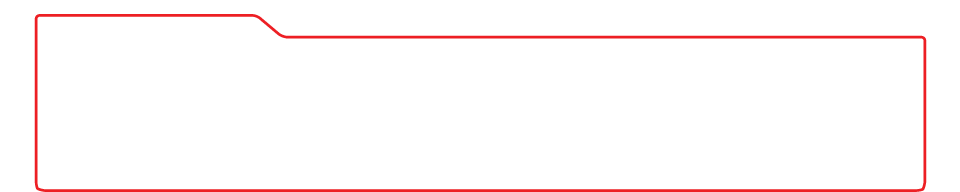
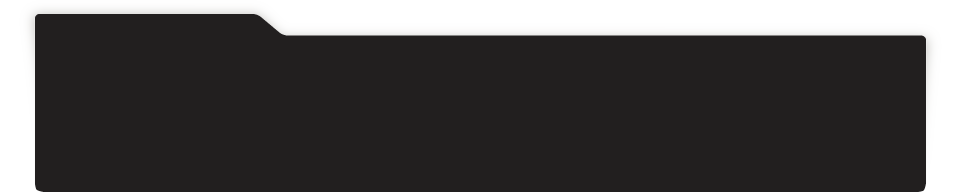
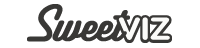
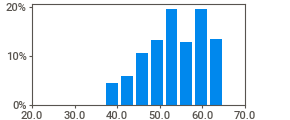
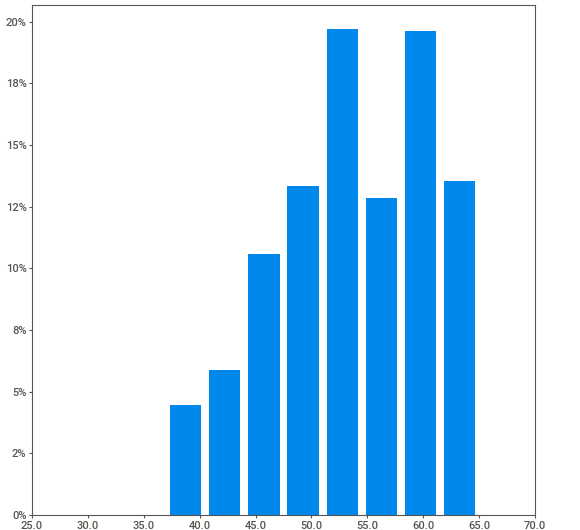
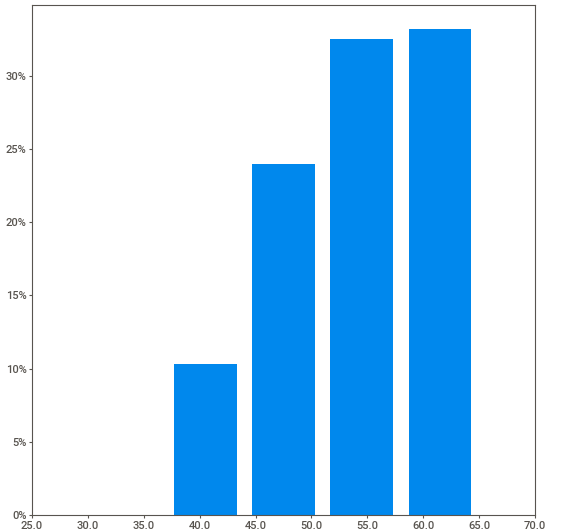
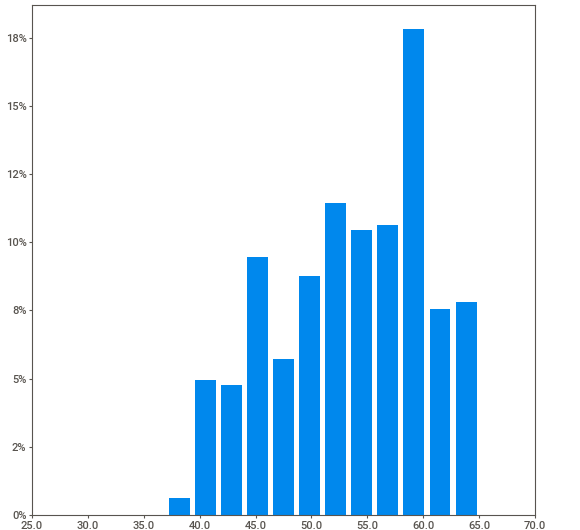
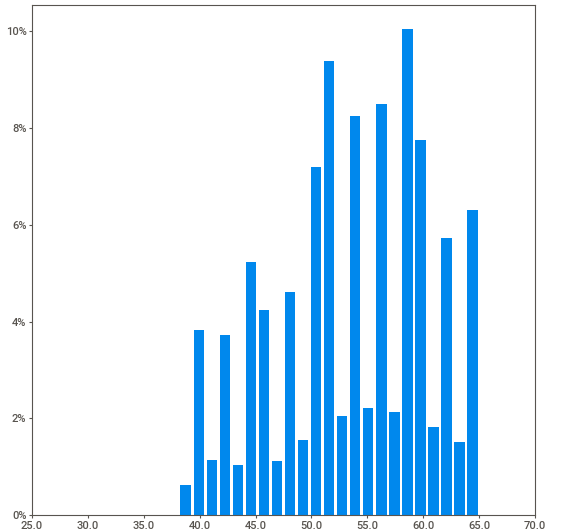
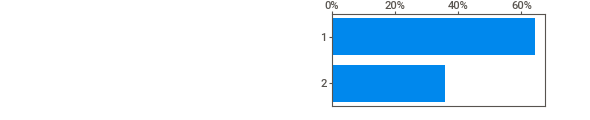
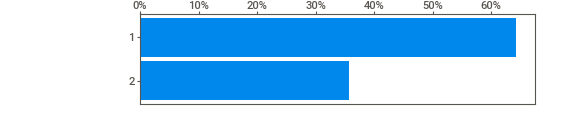
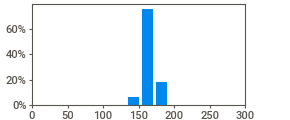
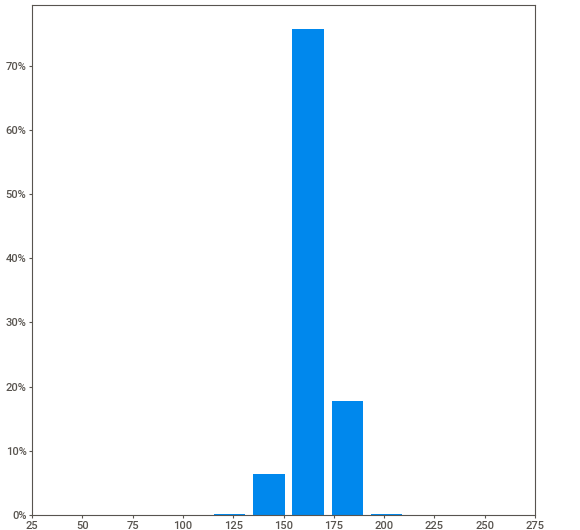
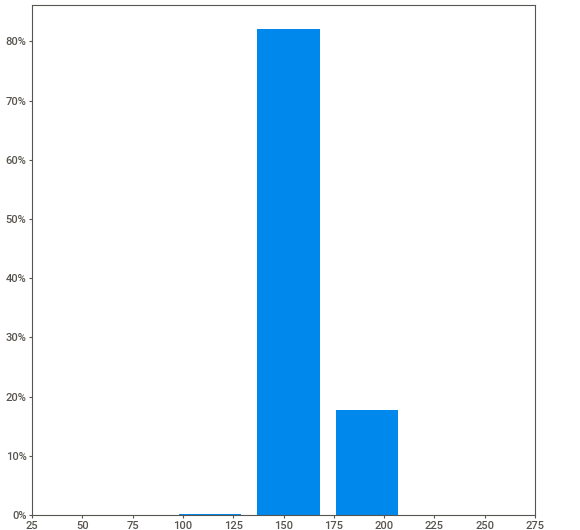
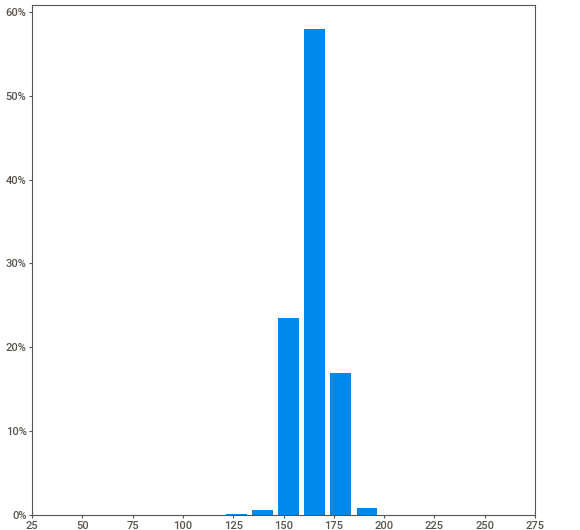
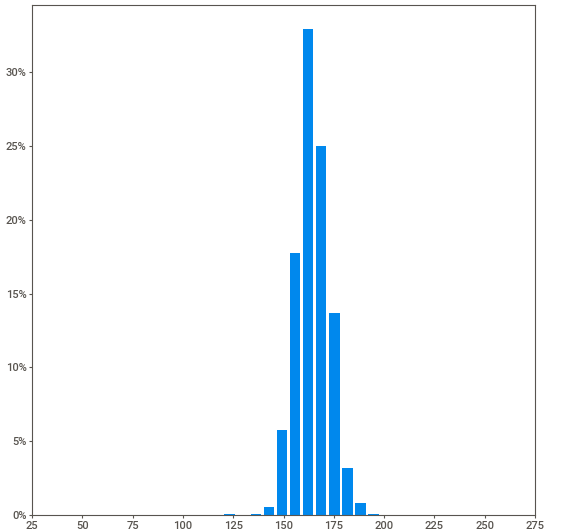
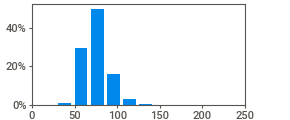
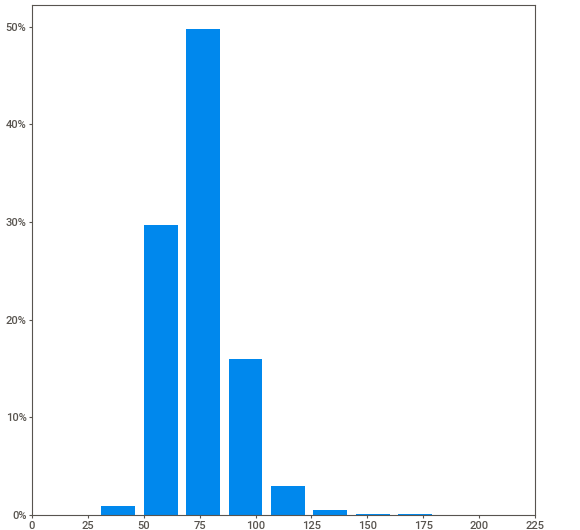
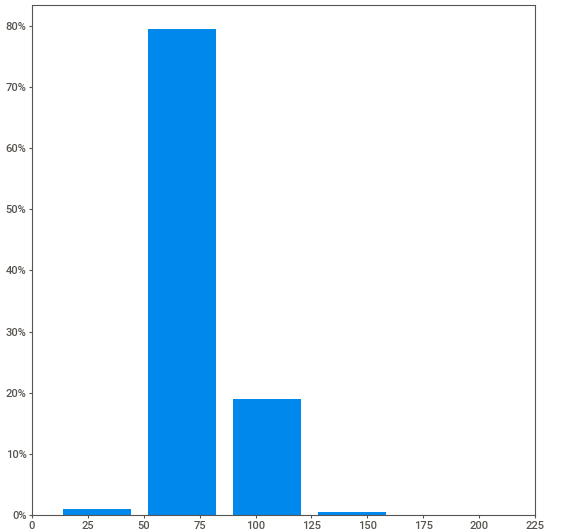
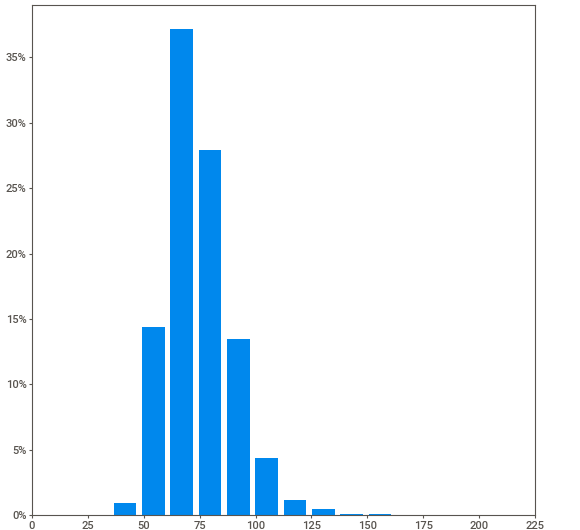
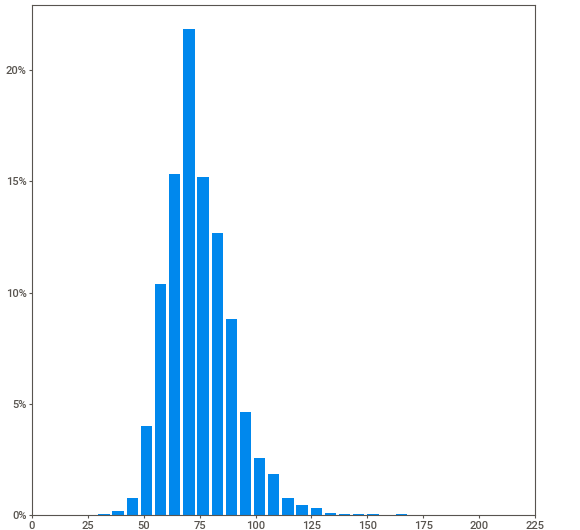
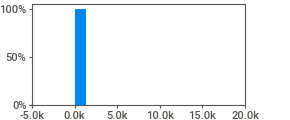
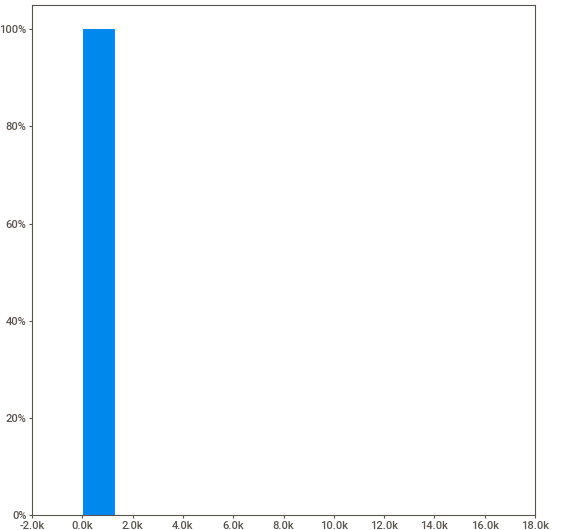
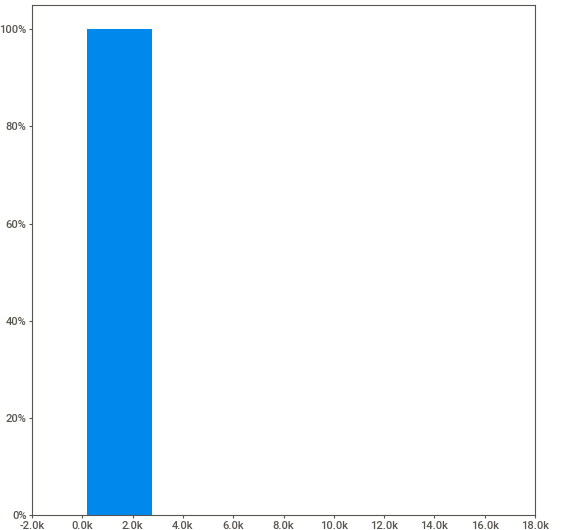
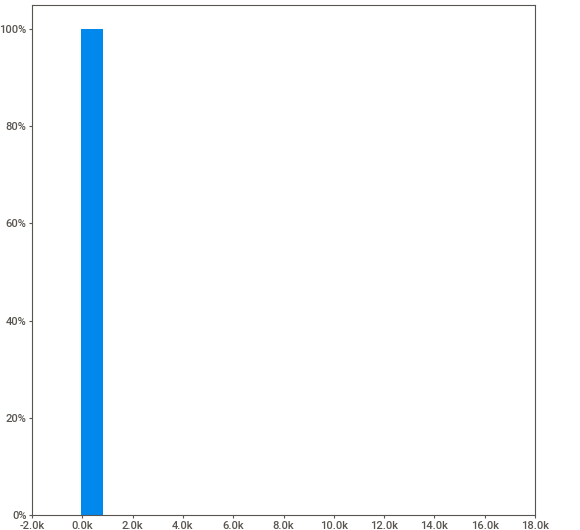
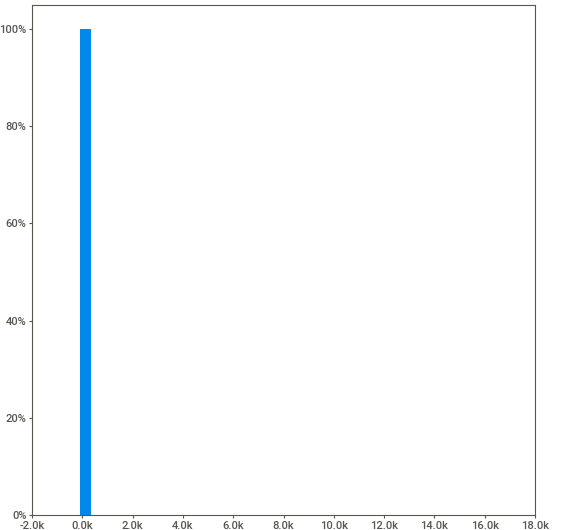
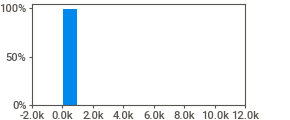
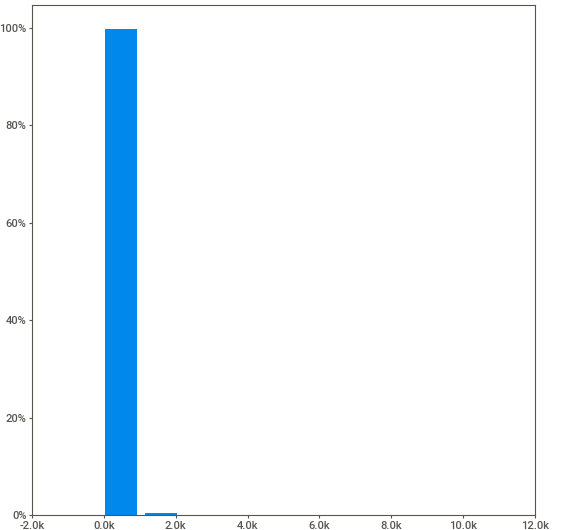
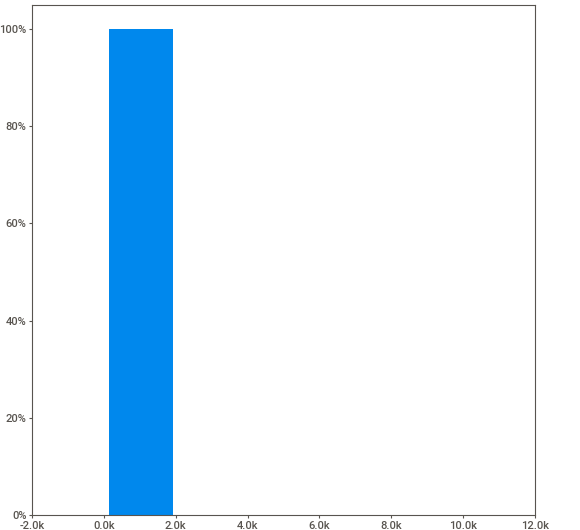
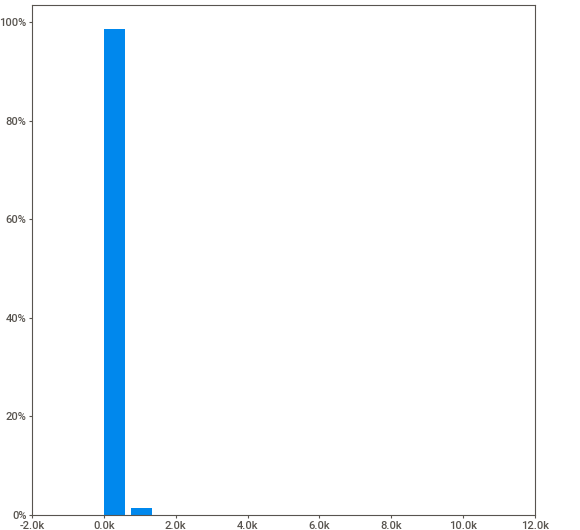
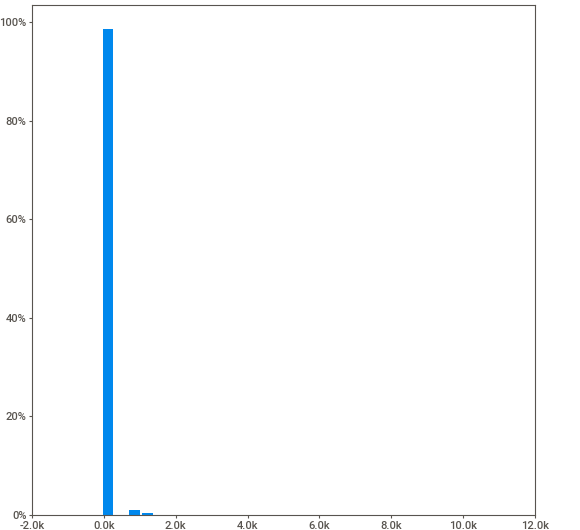
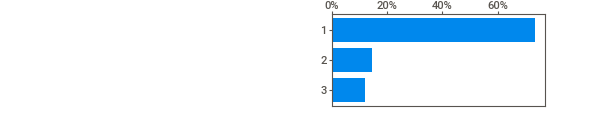
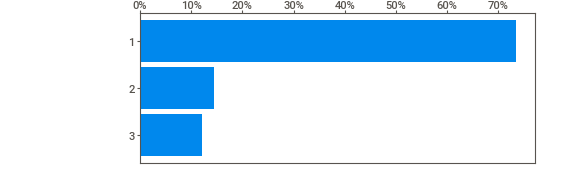
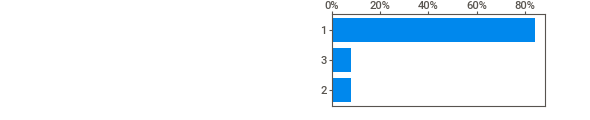
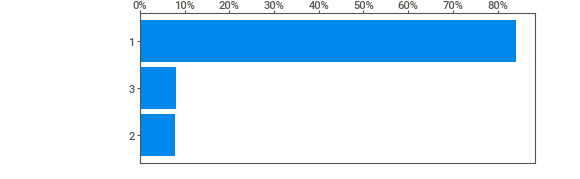
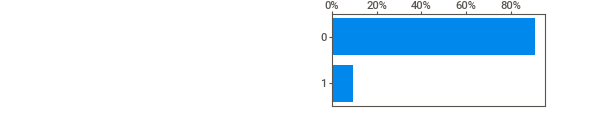
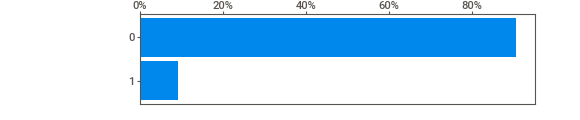
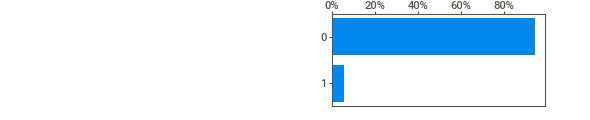
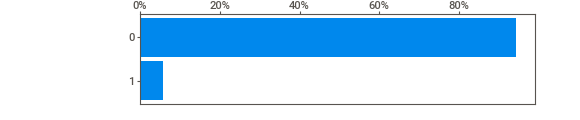
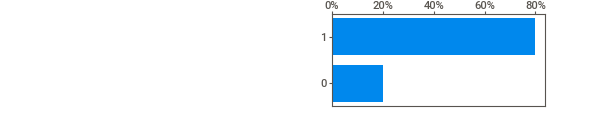
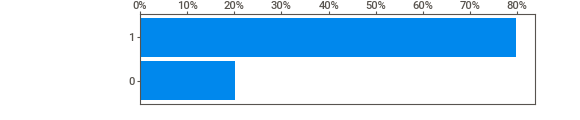
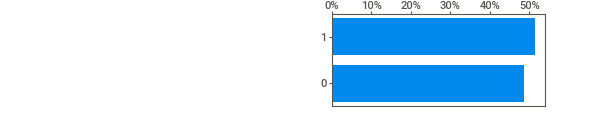
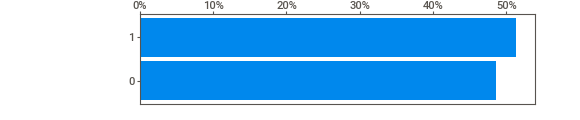
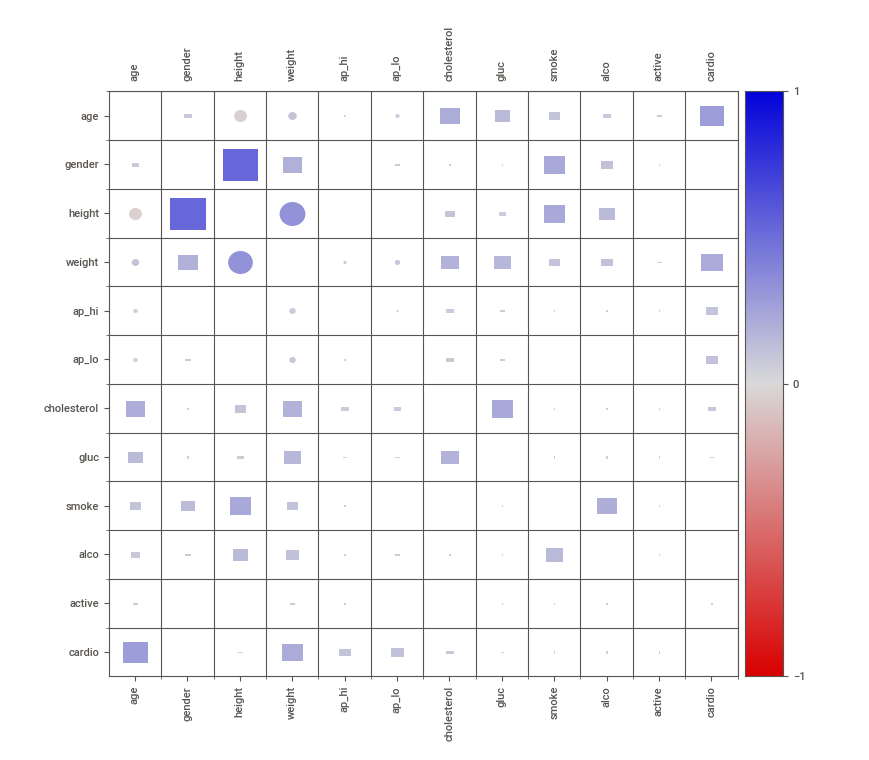
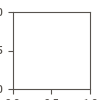

In [13]:
data_report = sv.analyze(data)
data_report.show_notebook()

<Axes: >

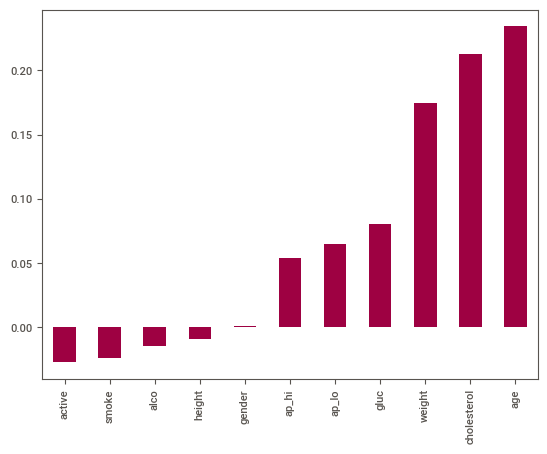

In [14]:
data.corr()['cardio'][:-1].sort_values().plot(kind='bar',cmap='Spectral')

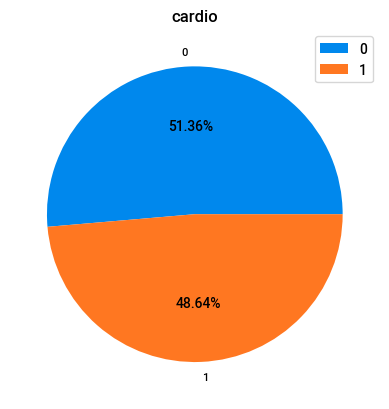

In [15]:
plt.pie(x = data['cardio'].value_counts(), labels = data['cardio'].unique(), autopct = '%1.2f%%');plt.title('cardio')
plt.legend()

<Axes: title={'center': 'Correlation'}>

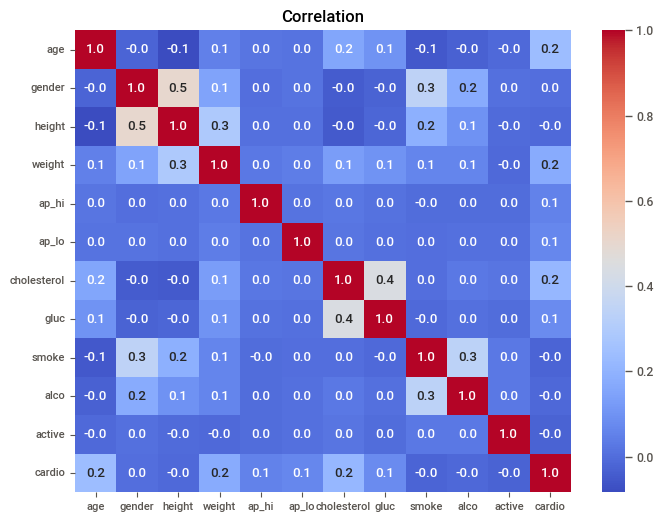

In [16]:
plt.figure(figsize=(8,6))
plt.title('Correlation')
sns.set_context('paper',font_scale=1)
sns.heatmap(data.corr(),annot=True,fmt=".1f",cmap="coolwarm")

## Model

In [17]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train ,X_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2)

### XGboost

In [19]:
xgb = xgbc(n_estimators=500,learning_rate=0.1)
xgb.fit(X_train,y_train);

In [20]:
xgb_pred = xgb.predict(X_test)

In [22]:
print(classification_report(y_true=y_test ,y_pred=xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6463
           1       0.75      0.71      0.73      6774

    accuracy                           0.73     13237
   macro avg       0.73      0.73      0.73     13237
weighted avg       0.73      0.73      0.73     13237



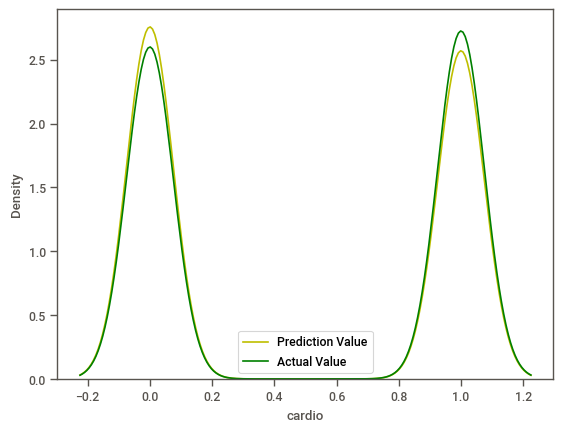

In [23]:
sns.distplot(xgb_pred, color="y", label="Prediction Value",hist=False)
sns.distplot(y_test,  color="g", label="Actual Value",hist=False)
plt.legend()

In [24]:
xgb_pred_proba = xgb.predict_proba(X_test)[::,1]

In [25]:
def plot_roc_curve(y_pred , y_actual,acc):
  fpr, tpr, _ = roc_curve(y_actual, y_pred)
  auc = roc_auc_score(y_actual, y_pred)
  plt.figure(figsize=(8,6))
  plt.plot(fpr,tpr,label=f"Logistic Regression (accuracy ='{acc}' )" % auc)
  plt.legend(loc='lower right')
  plt.xlabel('FPR', size = 20)
  plt.ylabel('TPR', size = 20)
  plt.title("Receiver Operatinng Characteristics", size = 25)
  plt.plot([0, 1], [0, 1],'r--')
  plt.legend(loc='lower right')
  plt.show()


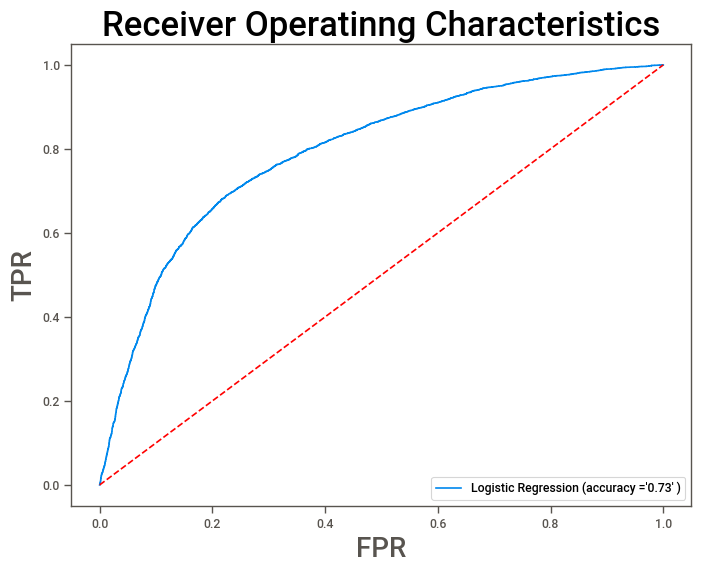

In [26]:
plot_roc_curve(y_pred= xgb_pred_proba , y_actual= y_test , acc=0.73)

### Logistic

In [27]:
Logistic_model = LogisticRegression()

In [28]:
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
logistic_pred = Logistic_model.predict(X_test)

In [30]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6463
           1       0.72      0.70      0.71      6774

    accuracy                           0.71     13237
   macro avg       0.71      0.71      0.71     13237
weighted avg       0.71      0.71      0.71     13237



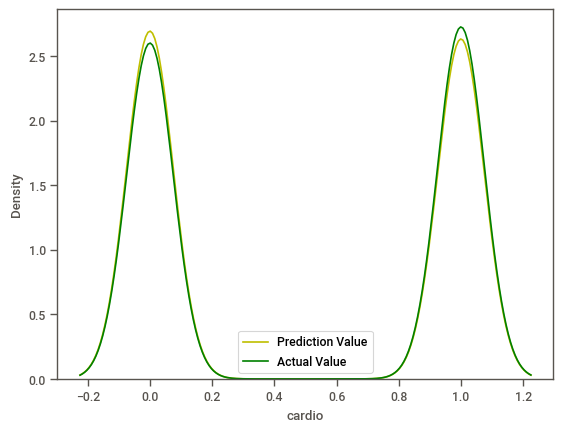

In [31]:
sns.distplot(logistic_pred, color="y", label="Prediction Value",hist=False)
sns.distplot(y_test,  color="g", label="Actual Value",hist=False)
plt.legend()

In [32]:
log_pred_proba = Logistic_model.predict_proba(X_test)[::,1]

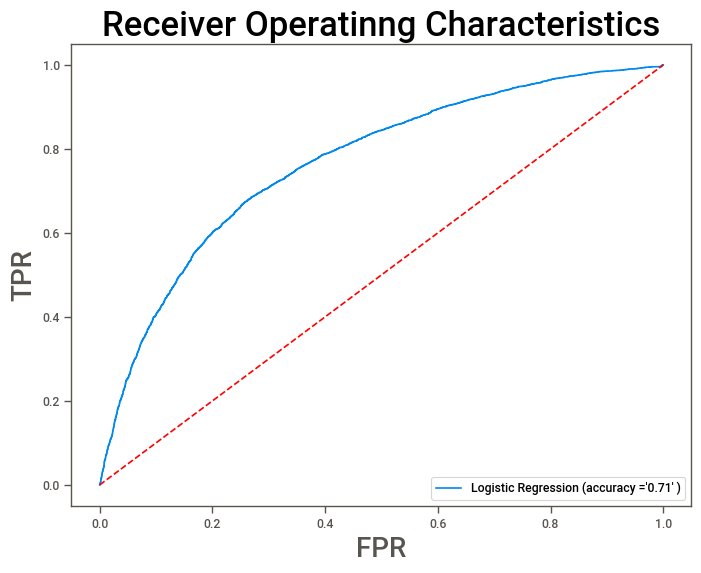

In [33]:
plot_roc_curve(y_pred= log_pred_proba , y_actual= y_test , acc=0.71)

### AdaBoost

In [34]:
adaboost_model = AdaBoostClassifier()

In [35]:
param_grid = {
    'n_estimators' : [25,50,100],
    'learning_rate' : [1.0,0.1],
    'random_state': [0,42]
}

In [36]:
grid = GridSearchCV(adaboost_model, param_grid, cv=3, verbose=1,scoring='accuracy')

In [37]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0, 0.1],
                         'n_estimators': [25, 50, 100],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=1)

In [38]:
print(grid.best_params_)

{'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 0}


In [45]:
adaboost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100,random_state=0)

In [47]:
adaboost.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [48]:
adaboost_pred = adaboost.predict(X_test)
adaboost_pred_proba = adaboost.predict_proba(X_test)[::,1]

In [50]:
print(classification_report(y_test,adaboost_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6463
           1       0.76      0.67      0.71      6774

    accuracy                           0.72     13237
   macro avg       0.73      0.72      0.72     13237
weighted avg       0.73      0.72      0.72     13237



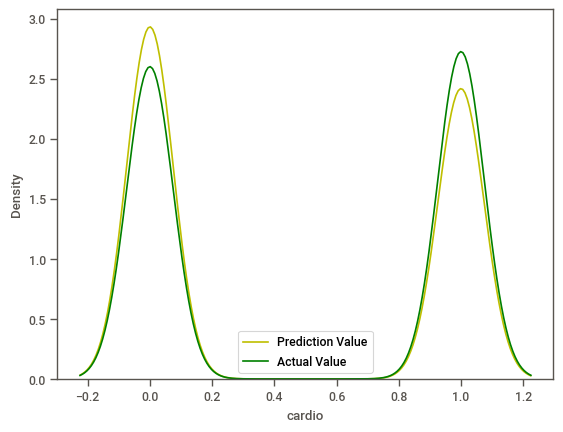

In [51]:
sns.distplot(adaboost_pred, color="y", label="Prediction Value",hist=False)
sns.distplot(y_test,  color="g", label="Actual Value",hist=False)
plt.legend()

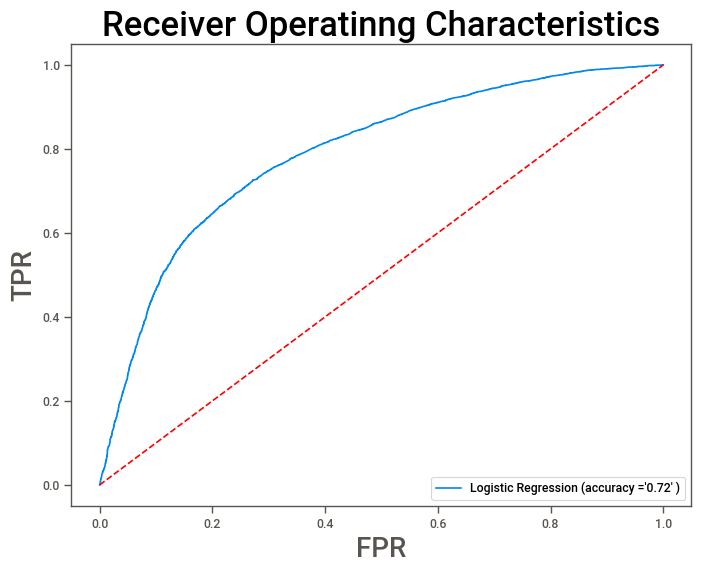

In [53]:
plot_roc_curve(y_pred= adaboost_pred_proba , y_actual= y_test , acc=0.72)

## Test & Save Best Model

In [56]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
56842,64,1,160,98.0,150,100,2,1,0,1,1
25186,64,1,176,112.0,120,80,1,1,0,0,1
21397,41,1,161,68.0,130,90,1,1,0,0,1
38113,56,1,160,70.0,120,80,3,3,0,0,0
12399,46,2,186,128.0,130,80,1,2,0,0,1


In [61]:
test = np.array((36,1,170,96.0,120,60,3,1,0,0,1)).reshape(1,-1)

In [62]:
test

array([[ 36.,   1., 170.,  96., 120.,  60.,   3.,   1.,   0.,   0.,   1.]])

In [63]:
pred = xgb.predict(test)

In [65]:
if pred[0] == 0 :
  print('not cardio')
else :
  print('cardio')

not cardio


In [70]:
import pickle

In [71]:
pickle.dump(xgb,open('model.sav','wb'))

In [72]:
model = pickle.load(open('model.sav','rb'))

In [73]:
prediction = model.predict(test)

In [74]:
if prediction[0] == 0 :
  print('not cardio')
else :
  print('cardio')

not cardio


In [75]:
for col in data.columns:
  print(f'{col} , min = {data[col].min()} , max ={data[col].max()}','\n')

age , min = 30 , max =65 

gender , min = 1 , max =2 

height , min = 55 , max =250 

weight , min = 10.0 , max =200.0 

ap_hi , min = -150 , max =16020 

ap_lo , min = -70 , max =11000 

cholesterol , min = 1 , max =3 

gluc , min = 1 , max =3 

smoke , min = 0 , max =1 

alco , min = 0 , max =1 

active , min = 0 , max =1 

cardio , min = 0 , max =1 

